In [1]:
import tensorflow as tf

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()

print(iris.data[0:3,])
print(iris.target[0:3,])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0]


Seleccionar Especie

In [18]:
selected_species = 0  # Cambia esto a 1 o 2 para otra especie
y_binary = (iris.target == selected_species).astype(int).reshape(-1, 1)

Dividamos los datos en entrenamiendo, validación y prueba 

In [19]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, y_binary, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

X_train.shape

(96, 4)

Normalizar Datos

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar entrenamiento
X_valid = scaler.transform(X_valid)  # Solo transformar validación
X_test = scaler.transform(X_test)

Crear Modelo

In [9]:
import tensorflow as tf
from tensorflow import keras

# Definir el modelo secuencial
model = keras.Sequential([
    keras.layers.Dense(8, activation="relu", input_shape=X_train.shape[1:]),  # Capa oculta con 8 neuronas
    keras.layers.Dense(4, activation="relu"),  # Segunda capa oculta con 4 neuronas
    keras.layers.Dense(1, activation="sigmoid")  # Capa de salida con activación sigmoide (para clasificación binaria)
])

c:\Users\Daniela\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [25]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9727 - loss: 0.2104 - val_accuracy: 1.0000 - val_loss: 0.2111
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9570 - loss: 0.2025 - val_accuracy: 1.0000 - val_loss: 0.2103
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9857 - loss: 0.2129 - val_accuracy: 1.0000 - val_loss: 0.2093
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9661 - loss: 0.2081 - val_accuracy: 1.0000 - val_loss: 0.2083
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9740 - loss: 0.1942 - val_accuracy: 1.0000 - val_loss: 0.2072
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9740 - loss: 0.2153 - val_accuracy: 1.0000 - val_loss: 0.2062
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9831 - loss: 0.2166 - val_accuracy: 1.0000 - val_loss: 0.2052
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9831 - loss: 0.2112 - val_accuracy: 1.0000 - val_loss:

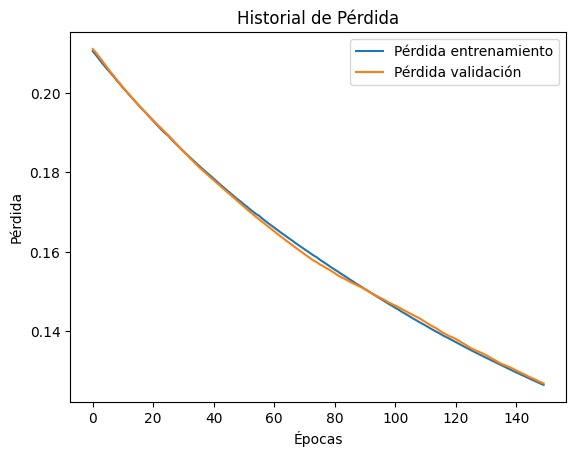

In [26]:

from matplotlib import pyplot as plt


plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Historial de Pérdida')
plt.show()

Métricas de Clasificación

In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

y_pred_prob = model.predict(X_test)  # Probabilidades
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir a 0 o 1

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


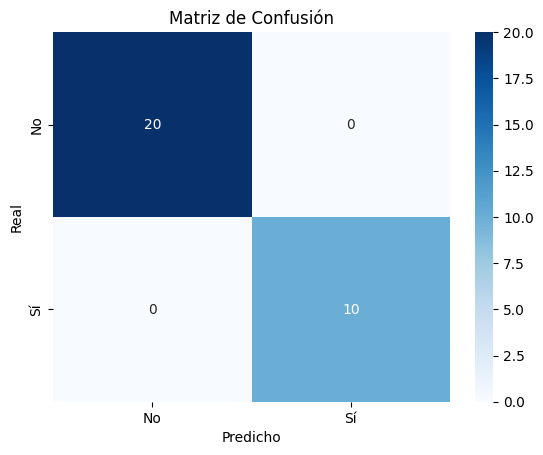

In [29]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


Modelo Diferentes

In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def build_and_train_model(layers, neurons, X_train, y_train, X_valid, y_valid, X_test, y_test):
    # Definir el modelo
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))  # Capa de entrada

    # Agregar capas ocultas según la configuración
    for _ in range(layers):
        model.add(keras.layers.Dense(neurons, activation="relu"))
    
    model.add(keras.layers.Dense(1, activation="sigmoid"))  # Capa de salida (para clasificación binaria)

    # Compilar el modelo
    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), verbose=0)

    # Evaluar el modelo en el conjunto de prueba
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return history, accuracy, precision, recall, f1


In [31]:
# Caso 1: Modelo base (1 capa oculta, 16 neuronas)
history1, acc1, prec1, rec1, f1_1 = build_and_train_model(1, 16, X_train, y_train, X_valid, y_valid, X_test, y_test)

# Caso 2: Modelo con más capas (3 capas ocultas, 32 neuronas cada una)
history2, acc2, prec2, rec2, f2_2 = build_and_train_model(3, 32, X_train, y_train, X_valid, y_valid, X_test, y_test)

# Caso 3: Modelo con menos neuronas (1 capa oculta, 8 neuronas)
history3, acc3, prec3, rec3, f3_3 = build_and_train_model(1, 8, X_train, y_train, X_valid, y_valid, X_test, y_test)


c:\Users\Daniela\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


c:\Users\Daniela\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


c:\Users\Daniela\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\Daniela\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
# Mostrar métricas en una tabla
import pandas as pd

results = pd.DataFrame({
    "Modelo": ["Base (1 capa, 16 neuronas)", "Profundo (3 capas, 32 neuronas)", "Simple (1 capa, 8 neuronas)"],
    "Accuracy": [acc1, acc2, acc3],
    "Precision": [prec1, prec2, prec3],
    "Recall": [rec1, rec2, rec3],
    "F1-score": [f1_1, f2_2, f3_3]
})

print(results)


                            Modelo  Accuracy  Precision  Recall  F1-score
0       Base (1 capa, 16 neuronas)  1.000000        1.0     1.0       1.0
1  Profundo (3 capas, 32 neuronas)  1.000000        1.0     1.0       1.0
2      Simple (1 capa, 8 neuronas)  0.666667        0.0     0.0       0.0


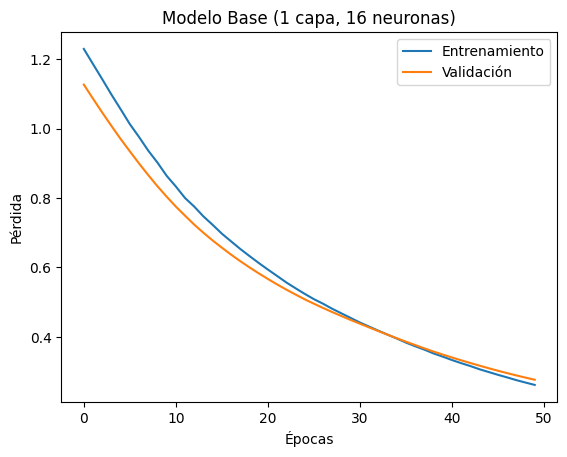

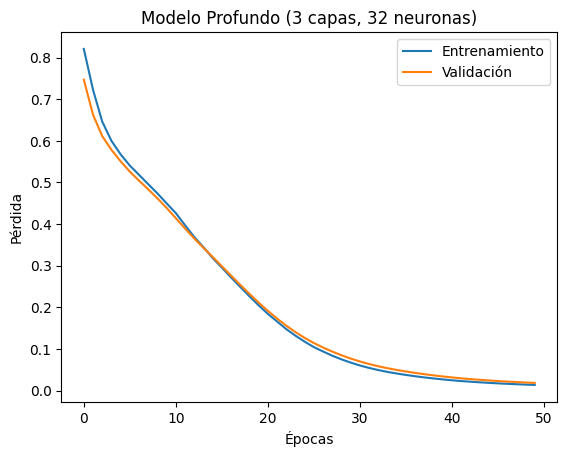

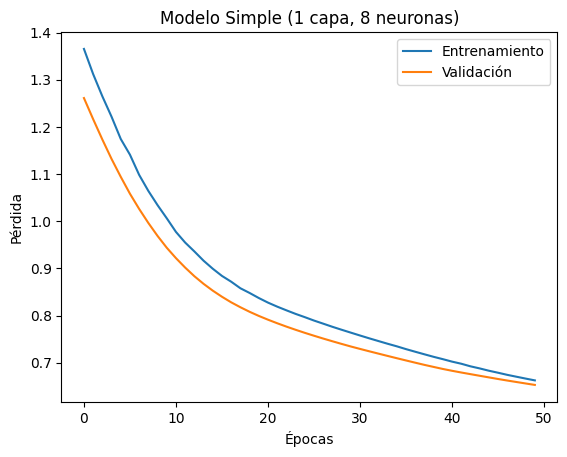

In [33]:
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.xlabel("Épocas")
    plt.ylabel("Pérdida")
    plt.title(title)
    plt.legend()
    plt.show()

# Graficar cada modelo
plot_loss(history1, "Modelo Base (1 capa, 16 neuronas)")
plot_loss(history2, "Modelo Profundo (3 capas, 32 neuronas)")
plot_loss(history3, "Modelo Simple (1 capa, 8 neuronas)")
